# Trading Bot

Welcome to our trading bot for Dow Jones stocks. This bot helps you to earn a lot of money.  
Just follow the instructions. 

### Before we can start, we first have to import a few libraries

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from own_jupyter_controls import dropdown_widget, generate_file_path_for_stock_data, network_architecture_widget
from stock_pred import train_bot
from trading import trading
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras'

## Selecting stock
Please select the ticker symbol of the Dow Jones stock your interested in.
First run the cell. Then select the ticker symbol from the dropdown-menu, then run the next Cell.

In [ ]:
widget = dropdown_widget()
display(widget)

In [3]:
file_path = generate_file_path_for_stock_data(widget.kwargs['x'])
print("The file path to your data is '" + file_path + "'")

The file path to your data is 'data/daily_MSFT.csv'


## Predicting stock
Next we train a neural network to learn to predict the course development of our selected stock. 
<br>
<br>
But first we have to select the hyperparameters of our network!  

In [24]:
# Network hyperparameters
two_lstm_layers=False
number_of_neurons_lstm=50
two_layers_second_branch=False
number_of_neurons_second_branch=20
dropout_rate=0.2

# Feature parameters
history_points = 50
s_and_p_500 = False

# Training parameters
number_of_epochs = 50

In [21]:
error, values_original, values_predicted, ohlcv_test, tech_ind_test, model, y_normaliser = train_bot(file_path=file_path, 
                                                                                                     history_points=history_points, 
                                                                                                     number_of_epochs=number_of_epochs, 
                                                                                                     two_lstm_layers=two_lstm_layers, 
                                                                                                     number_of_neurons_lstm=number_of_neurons_lstm,
                                                                                                     two_layers_second_branch=two_layers_second_branch, 
                                                                                                     number_of_neurons_second_branch=number_of_neurons_second_branch, 
                                                                                                     dropout_rate=dropout_rate,
                                                                                                    s_and_p_500=s_and_p_500)

Start csv_to_dataset
    timestamp    open    high     low   close    volume
0  2019-10-31  144.90  144.93  142.99  143.37  24489475
1  2019-10-30  143.52  145.00  142.79  144.61  18471700
2  2019-10-29  144.08  144.50  142.65  142.83  20519700
3  2019-10-28  144.40  145.67  143.51  144.19  35243000
4  2019-10-25  139.34  141.14  139.20  140.73  25274600
(5033, 6)
    timestamp  change_S&P500
1  1990-10-29      -1.750660
2  1990-10-30      -0.938500
3  1990-10-31       0.722139
4  1990-11-01      -0.023024
5  1990-11-02       0.996743
Before reordering
    timestamp    open    high     low   close    volume
0  2019-10-31  144.90  144.93  142.99  143.37  24489475
1  2019-10-30  143.52  145.00  142.79  144.61  18471700
2  2019-10-29  144.08  144.50  142.65  142.83  20519700
3  2019-10-28  144.40  145.67  143.51  144.19  35243000
4  2019-10-25  139.34  141.14  139.20  140.73  25274600
(5033, 6)
After reordering
       timestamp    open    high     low   close    volume
5032  1999-11-01  9

### The error of our network

In [22]:
print("The Mean-squared error of our network on the test set is " + "{:10.3f}".format(error))

The Mean-squared error of our network on the test set is     24.702


#### Plot of our network's performance on the test set

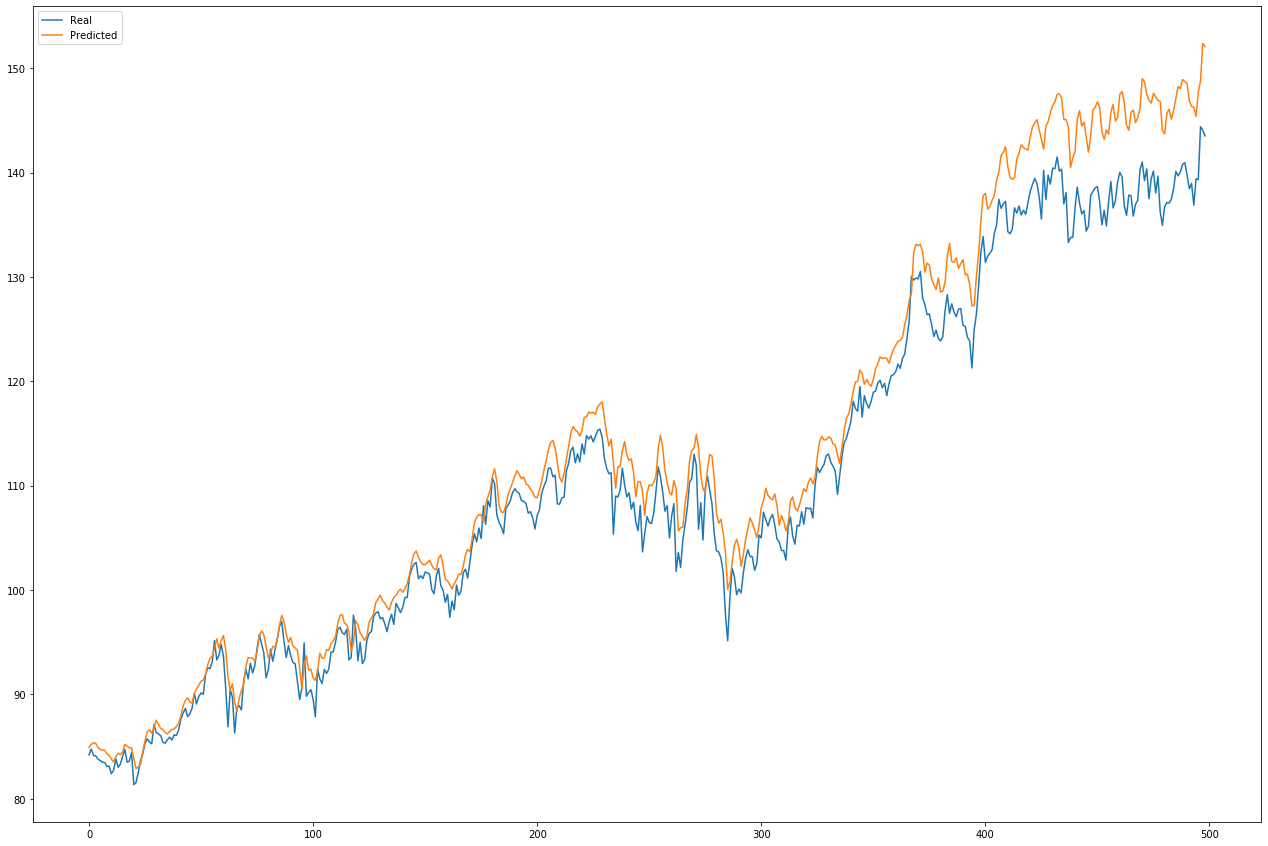

In [23]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
plt.legend(['Real', 'Predicted'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()

## Trading stock
With the predictions working we can trade stock. Let's see how our bot would have performed on the test set when trading stock.

In [ ]:
buys, sells = trading(ohlcv_test, tech_ind_test, y_normaliser, model)

#### Let's plot our bot's trading patterns

In [1]:
plt.gcf().set_size_inches(22, 15, forward=True)
real = plt.plot(values_original, label='real')
pred = plt.plot(values_predicted, label='predicted')
if len(buys) > 0:
    plt.scatter(list(list(zip(*buys))[0]), list(list(zip(*buys))[1]), c='#00ff00', s=50)
if len(sells) > 0:
    plt.scatter(list(list(zip(*sells))[0]), list(list(zip(*sells))[1]), c='#ff0000', s=50)
# real = plt.plot(unscaled_y[start:end], label='real')
# pred = plt.plot(y_predicted[start:end], label='predicted')
plt.legend(['Real', 'Predicted', 'Buy', 'Sell'])
# Delete the comment to save the plot
save_string = str(widget.kwargs['x']) + '.png'
plt.savefig(save_string)
plt.show()

NameError: name 'plt' is not defined